In [4]:
##%matplotlib notebook

In [5]:
## Import Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
import os
from datetime import datetime,date
from scipy.stats import linregress
import gmaps
from api_keys import g_key

file = "Resources/California_Fire_Incidents.csv"

In [6]:
## Read csv
fire_df = pd.read_csv(file)

In [7]:
## Preview Dataframe
fire_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [8]:
## Filter wanted columns
filtered_df= fire_df[["AcresBurned","ArchiveYear","Counties","Extinguished","Latitude","Longitude","Name","Started"]]
filtered_df

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z
...,...,...,...,...,...,...,...,...
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z
1632,2.0,2019,Nevada,2019-06-28T17:33:00Z,39.409722,-121.000556,Long Fire,2019-06-28T15:03:04Z
1633,NaN,2019,Yolo,NaN,38.734634,-121.729691,Cashe Fire,2019-11-25T12:02:02Z
1634,NaN,2019,San Diego,NaN,33.351145,-117.403719,Oak Fire,2019-10-22T19:20:44Z


In [9]:
## Check for missing values
filtered_df.count()

AcresBurned     1633
ArchiveYear     1636
Counties        1636
Extinguished    1577
Latitude        1636
Longitude       1636
Name            1636
Started         1636
dtype: int64

In [10]:
## Drop rows with any nan value
clean_fire_df = filtered_df.dropna(how="any")

In [11]:
## Check clean Dataframe
clean_fire_df.count()

AcresBurned     1577
ArchiveYear     1577
Counties        1577
Extinguished    1577
Latitude        1577
Longitude       1577
Name            1577
Started         1577
dtype: int64

In [12]:
## Check variable types
clean_fire_df.dtypes

AcresBurned     float64
ArchiveYear       int64
Counties         object
Extinguished     object
Latitude        float64
Longitude       float64
Name             object
Started          object
dtype: object

In [13]:
dups_removed_df=filtered_df.drop_duplicates(subset=["AcresBurned", "Latitude","Longitude"], keep="last", inplace=False)
dups_removed_df

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z
...,...,...,...,...,...,...,...,...
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z
1632,2.0,2019,Nevada,2019-06-28T17:33:00Z,39.409722,-121.000556,Long Fire,2019-06-28T15:03:04Z
1633,NaN,2019,Yolo,NaN,38.734634,-121.729691,Cashe Fire,2019-11-25T12:02:02Z
1634,NaN,2019,San Diego,NaN,33.351145,-117.403719,Oak Fire,2019-10-22T19:20:44Z


In [14]:
dups_removed_df=dups_removed_df.dropna(how="any")

In [15]:
dups_removed_df.count()

AcresBurned     1508
ArchiveYear     1508
Counties        1508
Extinguished    1508
Latitude        1508
Longitude       1508
Name            1508
Started         1508
dtype: int64

In [16]:
## Grouped by year and summed acres burned per year
acres_by_year = dups_removed_df.groupby(["ArchiveYear"])
sum_acresburned = acres_by_year["AcresBurned"].sum()
sum_acresburned

ArchiveYear
2013     522502.0
2014     439008.0
2015     541343.0
2016     500145.0
2017    1365219.0
2018    1549401.0
2019     200580.0
Name: AcresBurned, dtype: float64

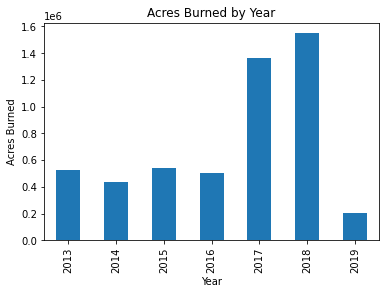

In [17]:
## Bar Plot
sum_acresburned.plot(kind="bar")

plt.title("Acres Burned by Year")
plt.ylabel("Acres Burned")
plt.xlabel("Year")

# Save figure as .png
plt.savefig("Acres_Burned_by_Year_Bar.png")

plt.show()

In [18]:
## Create Dataframe for sum acres burned
sum_acresburned_df = pd.DataFrame(sum_acresburned)

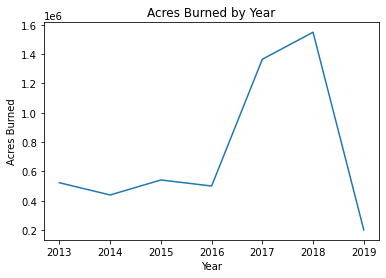

In [19]:
## Plot Line Chart
year = sum_acresburned_df.index
total_acres = sum_acresburned_df["AcresBurned"]

plt.plot(year, total_acres)

plt.title("Acres Burned by Year")
plt.ylabel("Acres Burned")
plt.xlabel("Year")

# Save figure as .png
plt.savefig("Acres_Burned_by_Year_Line.png")

plt.show()

In [20]:
## Find total fires per county
counties_count = clean_fire_df["Counties"].value_counts()
counties_df = pd.DataFrame({"Fires Per County": counties_count})
counties_df

,Fires Per County
Riverside,142
San Diego,85
Butte,65
San Luis Obispo,62
Shasta,62
Kern,60
Fresno,56
Siskiyou,53
Tehama,51
San Bernardino,50


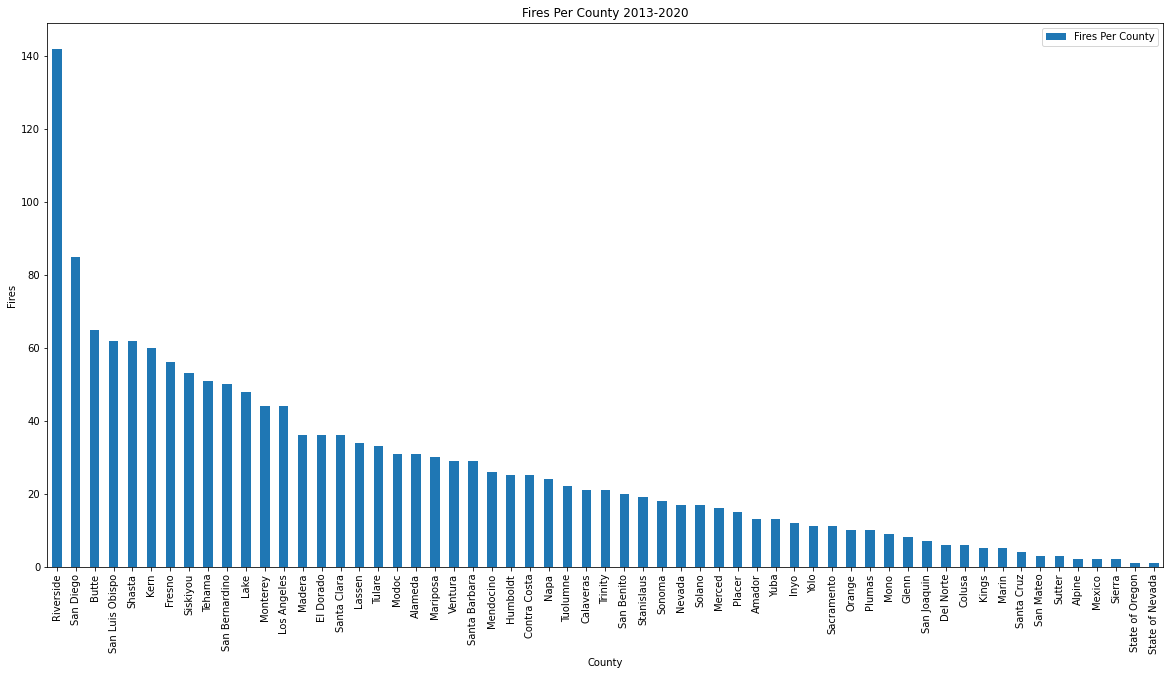

In [21]:
## Bar Plot
counties_df.plot(kind="bar", figsize=(20,10))

plt.title("Fires Per County 2013-2020")
plt.ylabel("Fires")
plt.xlabel("County")

# Save figure as .png
plt.savefig("Fires_Per_County_Bar.png")

plt.show()

In [22]:
dups_removed_df["Convert Date"] = pd.to_datetime(dups_removed_df["Started"])
dups_removed_df["Month Started"] = dups_removed_df["Convert Date"].dt.month

<ipython-input-22-58ad2b356f4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_removed_df["Convert Date"] = pd.to_datetime(dups_removed_df["Started"])
<ipython-input-22-58ad2b356f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_removed_df["Month Started"] = dups_removed_df["Convert Date"].dt.month


In [23]:
dups_removed_df

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5
...,...,...,...,...,...,...,...,...,...,...
1627,10.0,2019,Riverside,2019-09-10T10:45:00Z,33.496633,-116.631106,Bailey Fire,2019-09-10T10:43:58Z,2019-09-10 10:43:58+00:00,9
1629,10.0,2019,Siskiyou,2019-06-21T14:23:00Z,41.946220,-122.401570,IronGate Fire,2019-06-16T20:33:00Z,2019-06-16 20:33:00+00:00,6
1630,10.0,2019,Butte,2019-05-08T08:47:00Z,39.839580,-121.957000,Cana Fire,2019-04-30T12:20:00Z,2019-04-30 12:20:00+00:00,4
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z,2019-10-10 12:08:00+00:00,10


In [24]:
dups_removed_df.dtypes

AcresBurned                  float64
ArchiveYear                    int64
Counties                      object
Extinguished                  object
Latitude                     float64
Longitude                    float64
Name                          object
Started                       object
Convert Date     datetime64[ns, UTC]
Month Started                  int64
dtype: object

In [25]:
## Fires by Month 2013-2020
month_count = dups_removed_df["Month Started"].value_counts()
fires_per_month_df = pd.DataFrame({"Total Fires Started Per Month": month_count})
fires_per_month_df = fires_per_month_df.sort_index()
fires_per_month_df

,Total Fires Started Per Month
1,9
2,9
3,6
4,34
5,137
6,305
7,374
8,263
9,185
10,128


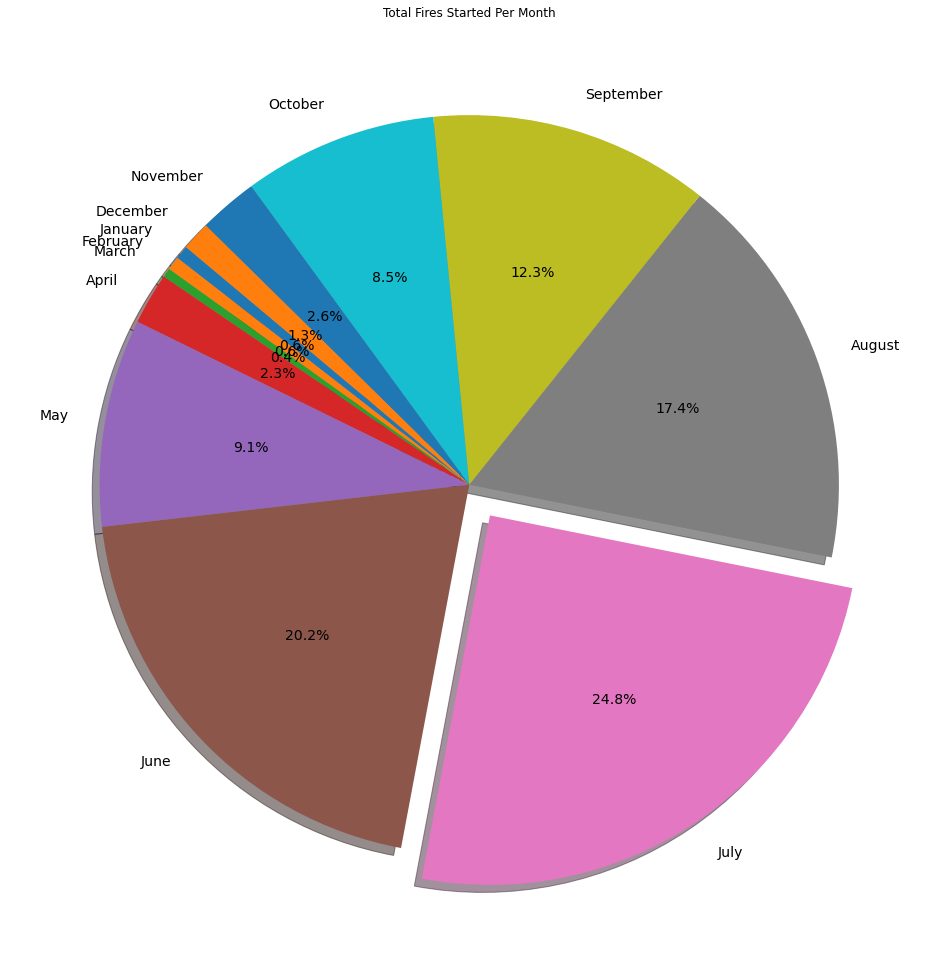

In [26]:
## Pie Plot

fig = plt.figure(figsize=(17,17))
labels=["January","February","March","April","May","June","July","August","September","October","November","December"]
sizes= fires_per_month_df["Total Fires Started Per Month"]
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 14},
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Total Fires Started Per Month")

# Save figure as .png
plt.savefig("Total_Fires_Per_Month_Pie.png")

plt.show()

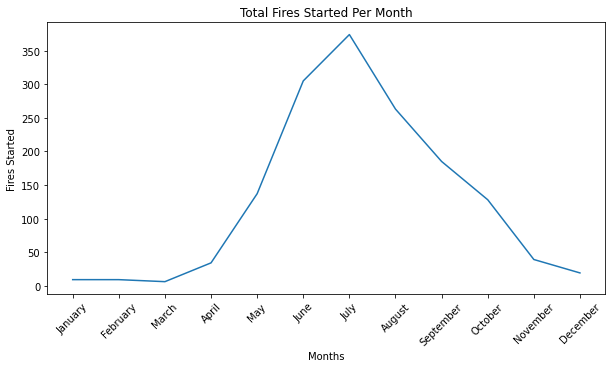

In [27]:
## Plot Line Chart
fig = plt.figure(figsize=(10,5))

month = fires_per_month_df.index
fires_by_month = fires_per_month_df["Total Fires Started Per Month"]

plt.plot(month, fires_by_month)

plt.title("Total Fires Started Per Month")
plt.ylabel("Fires Started")
plt.xlabel("Months")

months = fires_per_month_df.index
x_axis = np.arange(len(months))
tick_locations=[value for value in x_axis+1]
plt.xticks(tick_locations,["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45)


# Save figure as .png
plt.savefig("Total_Fires_Per_Month_Line.png")

plt.show()

In [28]:
dups_removed_df["Extinguished Convert Date"] = pd.to_datetime(dups_removed_df["Extinguished"])
dups_removed_df.head()

<ipython-input-28-1cf8e0d92645>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_removed_df["Extinguished Convert Date"] = pd.to_datetime(dups_removed_df["Extinguished"])


,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started,Extinguished Convert Date
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8,2013-09-06 18:30:00+00:00
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5,2013-06-08 18:30:00+00:00
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7,2013-07-30 18:00:00+00:00
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8,2013-08-30 08:00:00+00:00
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5,2013-05-11 06:30:00+00:00


In [29]:
# create two dates with year, month, day, hour, minute, and second
date1 = (dups_removed_df["Convert Date"])
date2 = (dups_removed_df["Extinguished Convert Date"])
# Difference between two dates
dups_removed_df["Duration"] = date2-date1

<ipython-input-29-622ffcf7b2f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_removed_df["Duration"] = date2-date1


In [30]:
dups_removed_df.head(10)

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started,Extinguished Convert Date,Duration
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8,2013-09-06 18:30:00+00:00,20 days 03:05:00
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5,2013-06-08 18:30:00+00:00,9 days 03:02:00
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7,2013-07-30 18:00:00+00:00,15 days 04:17:00
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8,2013-08-30 08:00:00+00:00,19 days 15:30:00
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5,2013-05-11 06:30:00+00:00,8 days 23:29:00
5,22992.0,2013,Fresno,2013-09-24T20:15:00Z,37.279000,-119.318000,Aspen Fire,2013-07-22T22:15:00Z,2013-07-22 22:15:00+00:00,7,2013-09-24 20:15:00+00:00,63 days 22:00:00
6,20292.0,2013,Riverside,2013-08-12T18:00:00Z,33.861570,-116.904270,Silver Fire,2013-08-07T14:05:00Z,2013-08-07 14:05:00+00:00,8,2013-08-12 18:00:00+00:00,5 days 03:55:00
7,14754.0,2013,Siskiyou,2013-08-31T06:45:00Z,41.320000,-123.176000,Salmon River Complex,2013-07-31T22:00:00Z,2013-07-31 22:00:00+00:00,7,2013-08-31 06:45:00+00:00,30 days 08:45:00
8,12503.0,2013,Humboldt,2013-08-12T12:00:00Z,41.035000,-123.488000,Corral Complex,2013-08-10T11:40:00Z,2013-08-10 11:40:00+00:00,8,2013-08-12 12:00:00+00:00,2 days 00:20:00
9,11429.0,2013,Tehama,2013-08-29T16:45:00Z,40.042630,-121.853970,Deer Fire,2013-08-23T14:15:00Z,2013-08-23 14:15:00+00:00,8,2013-08-29 16:45:00+00:00,6 days 02:30:00


In [31]:
dups_removed_df.dtypes

AcresBurned                              float64
ArchiveYear                                int64
Counties                                  object
Extinguished                              object
Latitude                                 float64
Longitude                                float64
Name                                      object
Started                                   object
Convert Date                 datetime64[ns, UTC]
Month Started                              int64
Extinguished Convert Date    datetime64[ns, UTC]
Duration                         timedelta64[ns]
dtype: object

In [32]:
dups_removed_df.count()

AcresBurned                  1508
ArchiveYear                  1508
Counties                     1508
Extinguished                 1508
Latitude                     1508
Longitude                    1508
Name                         1508
Started                      1508
Convert Date                 1508
Month Started                1508
Extinguished Convert Date    1508
Duration                     1508
dtype: int64

In [33]:
duration_list = dups_removed_df['Duration'].tolist()
duration_days = []

for duration in duration_list:
    try:
        x = np.timedelta64(duration, 'ns')
        days = x.astype('timedelta64[D]')
        y = days / np.timedelta64(1, 'D')
        duration_days.append(y)
    except:
        print("error")

In [34]:
duration_list

[Timedelta('20 days 03:05:00'),
 Timedelta('9 days 03:02:00'),
 Timedelta('15 days 04:17:00'),
 Timedelta('19 days 15:30:00'),
 Timedelta('8 days 23:29:00'),
 Timedelta('63 days 22:00:00'),
 Timedelta('5 days 03:55:00'),
 Timedelta('30 days 08:45:00'),
 Timedelta('2 days 00:20:00'),
 Timedelta('6 days 02:30:00'),
 Timedelta('5 days 18:58:00'),
 Timedelta('8 days 17:20:00'),
 Timedelta('7 days 23:48:00'),
 Timedelta('6 days 06:55:00'),
 Timedelta('5 days 16:11:00'),
 Timedelta('3 days 05:52:00'),
 Timedelta('6 days 04:22:00'),
 Timedelta('3 days 05:25:00'),
 Timedelta('6 days 01:23:00'),
 Timedelta('4 days 06:15:00'),
 Timedelta('31 days 05:44:00'),
 Timedelta('3 days 04:45:00'),
 Timedelta('9 days 21:03:00'),
 Timedelta('4 days 08:35:00'),
 Timedelta('4 days 18:11:00'),
 Timedelta('9 days 02:30:00'),
 Timedelta('4 days 19:40:00'),
 Timedelta('5 days 14:33:00'),
 Timedelta('3 days 06:45:00'),
 Timedelta('1 days 05:37:00'),
 Timedelta('2 days 09:15:00'),
 Timedelta('3 days 05:45:00'),
 T

In [35]:
duration_days

[20.0,
 9.0,
 15.0,
 19.0,
 8.0,
 63.0,
 5.0,
 30.0,
 2.0,
 6.0,
 5.0,
 8.0,
 7.0,
 6.0,
 5.0,
 3.0,
 6.0,
 3.0,
 6.0,
 4.0,
 31.0,
 3.0,
 9.0,
 4.0,
 4.0,
 9.0,
 4.0,
 5.0,
 3.0,
 1.0,
 2.0,
 3.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 3.0,
 5.0,
 0.0,
 0.0,
 4.0,
 3.0,
 0.0,
 5.0,
 0.0,
 4.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 16.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 19.0,
 5.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 -2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 4.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 26.0,
 4.0,
 15.0,
 18.0,
 34.0,
 24.0,
 6.0,
 0.0,
 13.0,
 15.0,
 41.0,
 7.0,
 106.0,
 17.0,

In [36]:
dups_removed_df["Duration Days"]=duration_days
dups_removed_df

<ipython-input-36-89dfb84fcc23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_removed_df["Duration Days"]=duration_days


,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started,Extinguished Convert Date,Duration,Duration Days
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8,2013-09-06 18:30:00+00:00,20 days 03:05:00,20.0
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5,2013-06-08 18:30:00+00:00,9 days 03:02:00,9.0
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7,2013-07-30 18:00:00+00:00,15 days 04:17:00,15.0
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8,2013-08-30 08:00:00+00:00,19 days 15:30:00,19.0
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5,2013-05-11 06:30:00+00:00,8 days 23:29:00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,10.0,2019,Riverside,2019-09-10T10:45:00Z,33.496633,-116.631106,Bailey Fire,2019-09-10T10:43:58Z,2019-09-10 10:43:58+00:00,9,2019-09-10 10:45:00+00:00,0 days 00:01:02,0.0
1629,10.0,2019,Siskiyou,2019-06-21T14:23:00Z,41.946220,-122.401570,IronGate Fire,2019-06-16T20:33:00Z,2019-06-16 20:33:00+00:00,6,2019-06-21 14:23:00+00:00,4 days 17:50:00,4.0
1630,10.0,2019,Butte,2019-05-08T08:47:00Z,39.839580,-121.957000,Cana Fire,2019-04-30T12:20:00Z,2019-04-30 12:20:00+00:00,4,2019-05-08 08:47:00+00:00,7 days 20:27:00,7.0
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z,2019-10-10 12:08:00+00:00,10,2019-10-10 18:11:00+00:00,0 days 06:03:00,0.0


In [37]:
filtered_duration_df=dups_removed_df.loc[(dups_removed_df["Duration Days"]>=0) & (dups_removed_df["Duration Days"]<673),:]
filtered_duration_df

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started,Extinguished Convert Date,Duration,Duration Days
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8,2013-09-06 18:30:00+00:00,20 days 03:05:00,20.0
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5,2013-06-08 18:30:00+00:00,9 days 03:02:00,9.0
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7,2013-07-30 18:00:00+00:00,15 days 04:17:00,15.0
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8,2013-08-30 08:00:00+00:00,19 days 15:30:00,19.0
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5,2013-05-11 06:30:00+00:00,8 days 23:29:00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,10.0,2019,Riverside,2019-09-10T10:45:00Z,33.496633,-116.631106,Bailey Fire,2019-09-10T10:43:58Z,2019-09-10 10:43:58+00:00,9,2019-09-10 10:45:00+00:00,0 days 00:01:02,0.0
1629,10.0,2019,Siskiyou,2019-06-21T14:23:00Z,41.946220,-122.401570,IronGate Fire,2019-06-16T20:33:00Z,2019-06-16 20:33:00+00:00,6,2019-06-21 14:23:00+00:00,4 days 17:50:00,4.0
1630,10.0,2019,Butte,2019-05-08T08:47:00Z,39.839580,-121.957000,Cana Fire,2019-04-30T12:20:00Z,2019-04-30 12:20:00+00:00,4,2019-05-08 08:47:00+00:00,7 days 20:27:00,7.0
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z,2019-10-10 12:08:00+00:00,10,2019-10-10 18:11:00+00:00,0 days 06:03:00,0.0


In [38]:
filtered_by_duration=filtered_duration_df[["ArchiveYear", "Duration Days"]]

In [39]:
duration_by_year = filtered_by_duration.groupby(["ArchiveYear"])
avg_fireduration = duration_by_year["Duration Days"].mean()
avg_fireduration

ArchiveYear
2013      3.006897
2014     10.762376
2015      5.763359
2016     11.670455
2017    164.923611
2018    170.275410
2019      4.814815
Name: Duration Days, dtype: float64

In [40]:
filtered_duration_df.dtypes

AcresBurned                              float64
ArchiveYear                                int64
Counties                                  object
Extinguished                              object
Latitude                                 float64
Longitude                                float64
Name                                      object
Started                                   object
Convert Date                 datetime64[ns, UTC]
Month Started                              int64
Extinguished Convert Date    datetime64[ns, UTC]
Duration                         timedelta64[ns]
Duration Days                            float64
dtype: object

In [41]:
(filtered_duration_df["Duration Days"]).value_counts().sort_index()

0.0      235
1.0      118
2.0       88
3.0       57
4.0       47
        ... 
359.0      1
360.0      1
366.0      1
464.0      1
672.0      1
Name: Duration Days, Length: 240, dtype: int64

The r-squared is: 0.002725074888774815


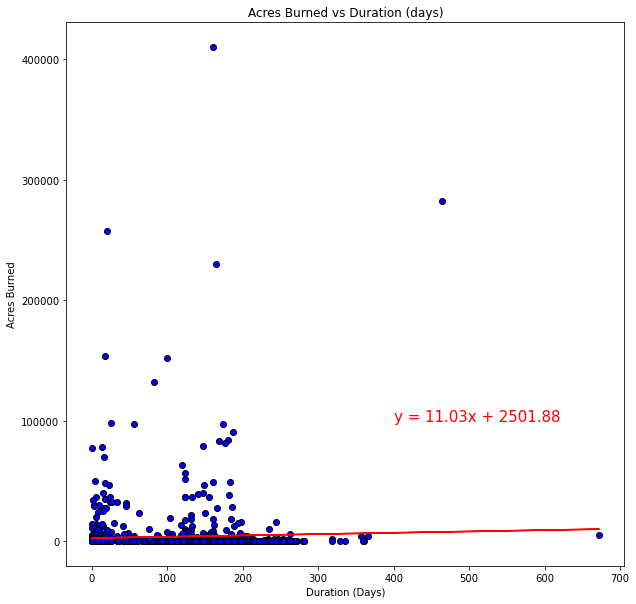

In [42]:
# Generate scatter of Acres Burned vs Duration (days)
fig = plt.figure(figsize=(10,10))
acres_burned = filtered_duration_df["AcresBurned"].tolist()
days = filtered_duration_df['Duration Days'].tolist()
plt.scatter(days, acres_burned, marker="o", facecolors="blue", edgecolors="black")
plt.title("Acres Burned vs Duration (days)")
plt.xlabel("Duration (Days)")
plt.ylabel("Acres Burned")

x_values = filtered_duration_df['Duration Days']
y_values = filtered_duration_df["AcresBurned"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(400,100000),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Acres_Burned_vs_Duration_Days.png")

The r-squared is: 0.002725074888774815


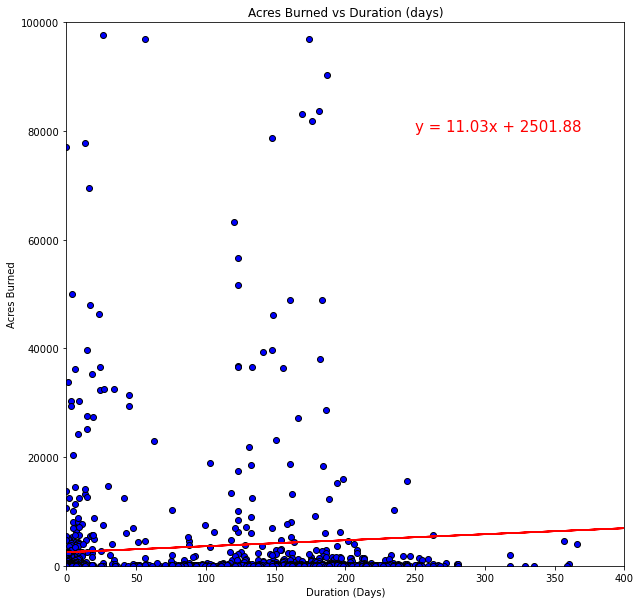

In [43]:
# Generate scatter of Acres Burned vs Duration (days)
fig = plt.figure(figsize=(10,10))
acres_burned = filtered_duration_df["AcresBurned"].tolist()
days = filtered_duration_df['Duration Days'].tolist()
plt.scatter(days, acres_burned, marker="o", facecolors="blue", edgecolors="black")
plt.title("Acres Burned vs Duration (days)")
plt.xlabel("Duration (Days)")
plt.ylabel("Acres Burned")
plt.xlim(0,400)
plt.ylim(0,100000)

x_values = filtered_duration_df['Duration Days']
y_values = filtered_duration_df["AcresBurned"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(250,80000),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Acres_Burned_vs_Duration_Days_zoomed.png")

In [44]:
map_df=dups_removed_df[["AcresBurned", "Latitude", "Longitude"]]
map2_df=map_df.sort_values(["AcresBurned"], ascending=False)
map2_df

,AcresBurned,Latitude,Longitude
1057,410203.0,39.243283,-123.103367
617,281893.0,34.415210,-119.091240
0,257314.0,37.857000,-120.086000
1059,229651.0,40.654280,-122.623570
1060,153336.0,39.813400,-121.434700
...,...,...,...
278,0.0,41.796000,-123.374000
1366,0.0,39.712170,-121.773850
1367,0.0,40.702580,-123.550120
1369,0.0,0.000000,0.000000


In [45]:
map3_df = map2_df[:5]

In [46]:
gmaps.configure()

In [52]:
# Store 'Lat' and 'Lng' into  locations
locations = map3_df[["Latitude", "Longitude"]].astype(float)


In [51]:
locations = map3_df[["Latitude", "Longitude"]]
fig_2 = gmaps.figure()
marker_layer = gmaps.marker_layer(locations, info_box_content="")
fig_2.add_layer(marker_layer)
fig_2

Figure(layout=FigureLayout(height='420px'))